# Project_10

### Import libraries

Importing necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import print_dataset_description, print_module_datasets
from bds_courseware import HOMEWORK_DATASETS

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### Since the same dataset is used as for the previous homework, I used something that I did in the last homework and I will share the link on which I did a more detailed EDA and so on:

### Data reading and exploring

In [ ]:
print('Dataset names:', HOMEWORK_DATASETS.keys())
name = 'bike_sharing_hour'
df = read_drive_dataset(*HOMEWORK_DATASETS[name])

Dataset names: dict_keys(['suicide_rates', 'car_perfs', 'brain', 'bank', 'air_quality', 'hypothyroid', 'movies', 'bike_sharing_day', 'bike_sharing_hour', 'quake'])


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Now I will investigate the number of values in each column.

In [ ]:
for column in df.columns:
    print('Number of unique values in column -', column, ": ", df[column].nunique())
    if df[column].nunique() < 10:
        print('Unique values in column -', column, ": ", df[column].unique())
    print("------------------------------------------------------------------------------------------------")

Number of unique values in column - instant :  17379
------------------------------------------------------------------------------------------------
Number of unique values in column - dteday :  731
------------------------------------------------------------------------------------------------
Number of unique values in column - season :  4
Unique values in column - season :  [1 2 3 4]
------------------------------------------------------------------------------------------------
Number of unique values in column - yr :  2
Unique values in column - yr :  [0 1]
------------------------------------------------------------------------------------------------
Number of unique values in column - mnth :  12
------------------------------------------------------------------------------------------------
Number of unique values in column - hr :  24
------------------------------------------------------------------------------------------------
Number of unique values in column - holiday :  

In [ ]:
df.shape

(17379, 17)

Dataset has 17379 rows and 17 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


From here I can see that the values are integer, object, float type and that there is null values.

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


I don't get any information from the instant column, so I'm going to delete it

In [ ]:
del df["instant"]

In [ ]:
def outliers_modification(data, column):
    for i in range(len(data)):
        if data[column][i] > np.percentile(data[column].unique(), 95):
            data[column][i] = np.percentile(data[column].unique(), 95)
    return data

In [ ]:
for column in ["hum", "windspeed",'casual','registered']:
    df = outliers_modification(df, column)

### Target column cnt

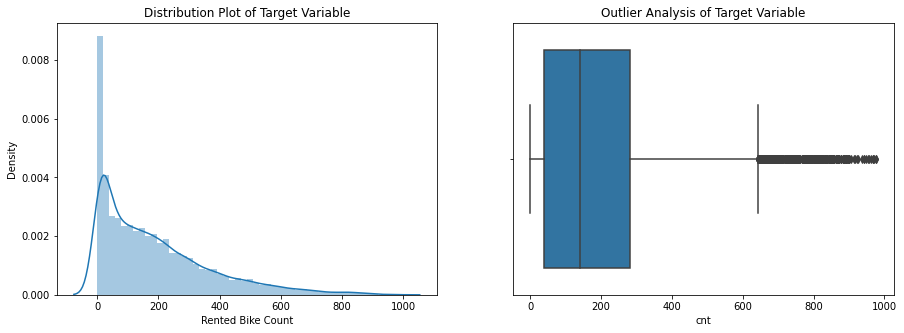

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

# Distribution plot of Rented Bike Count
dist =sns.distplot(df['cnt'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')


# Boxplot
box = sns.boxplot(df.cnt, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()


As for the target column, I see that it does not have a normal distribution, so I will use log and sqrt and see what is the better option and choose later depending on that.

<AxesSubplot:xlabel='cnt', ylabel='Density'>

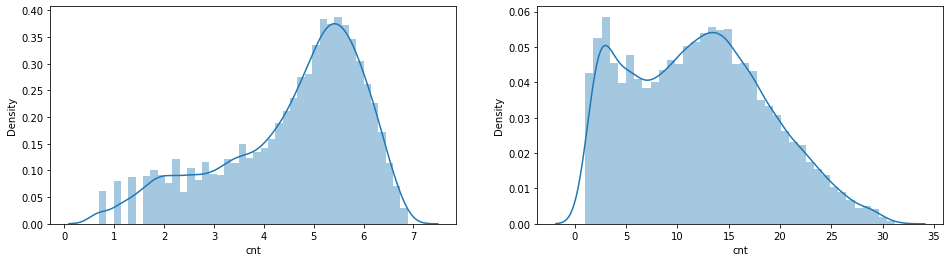

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(16,4))

sns.distplot(np.log1p(df['cnt']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['cnt']),kde=True, ax=axs[1])

Since I see that sqrt is the better option, I will choose it.

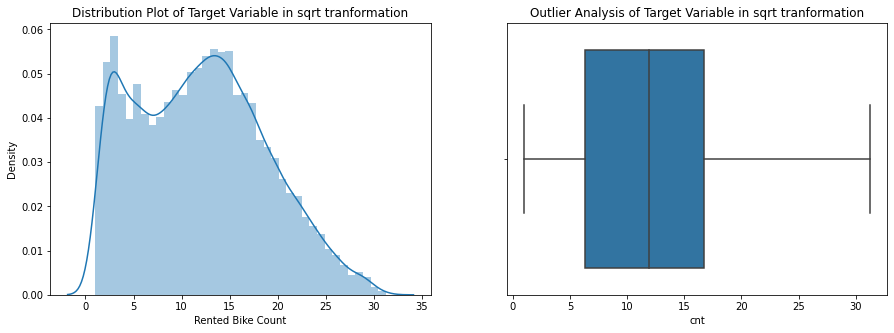

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

#  checking square root tranformation in our target variable
dist =sns.distplot(np.sqrt(df['cnt']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

# Boxplot
box = sns.boxplot(np.sqrt(df.cnt), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

## Task 1

##### TASK 1 - Perform EDA using Time Series Analysis techniques (any results od EDA from the previous homework can be used as well - please provide a shered link). EDA for this homework should include decomposition, correlation analysis and tests for stationarity. LINK:

Now I'm going to map the categorical columns.

In [ ]:
new_data = df.copy()
# tranform seasons
seasons_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
new_data['season'] = new_data['season'].apply(lambda x: seasons_mapping[x])
# transform yr
yr_mapping = {0: 2011, 1: 2012}
new_data['yr'] = new_data['yr'].apply(lambda x: yr_mapping[x])
# transform weekday
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
new_data['weekday'] = new_data['weekday'].apply(lambda x: weekday_mapping[x])
# transform weathersit
weather_mapping = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
new_data['weathersit'] = new_data['weathersit'].apply(lambda x: weather_mapping[x])
# transorm hum and windspeed
new_data['hum'] = new_data['hum']*100
new_data['windspeed'] = new_data['windspeed']*67
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
new_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,spring,2012,Friday,cloudy,89.0,12.9980
3262,spring,2011,Friday,clear,64.0,7.0015
10763,spring,2012,Thursday,clear,42.0,23.9994
12384,spring,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


(5.5, -0.5)

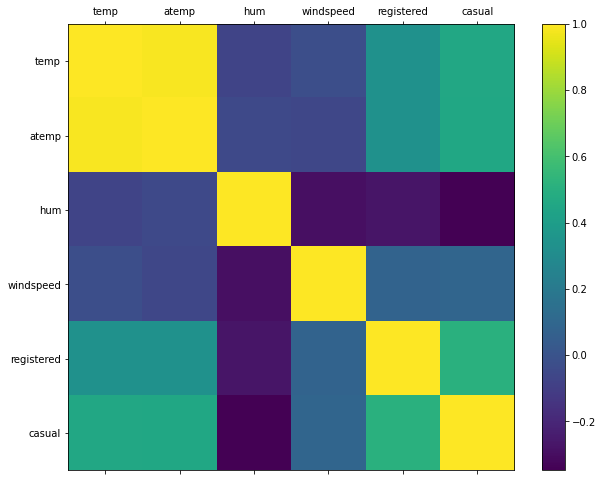

In [ ]:
# plot correlation matrix
cols = ["temp", "atemp", "hum", "windspeed", "registered", "casual"]
plot_data = new_data[cols]
corr = plot_data.corr()

fig = plt.figure(figsize=(10,8))
plt.matshow(corr, fignum=fig.number)
plt.xticks(range(len(plot_data.columns)), plot_data.columns)
plt.yticks(range(len(plot_data.columns)), plot_data.columns)
plt.colorbar()
plt.ylim([5.5, -0.5])

In [ ]:
data_target = new_data[["dteday", "cnt"]]
data_target = data_target.groupby("dteday").sum()

# convert index to DateTime object
data_target.index = pd.to_datetime(data_target.index)

### Checking stationarity

First i will check stationarity. I will use two methods for this: the rolling statistics, augmented Dickey-Fuller stationarity test and KPSS test.

First I will do rolling statistic. Rolling statistics is a practical method in which we plot the rolling mean and standard deviation of a time series and visually identify whether those values ​​fluctuate around a constant one, without large deviations.

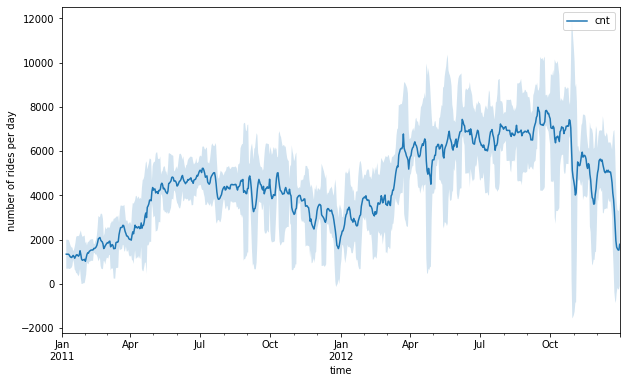

In [ ]:
# create new dataframe with necessary for plotting columns, and
# obtain number of rides per day, by grouping over each day
plot_data = data_target
plot_data = plot_data.groupby('dteday').sum()

# define window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

# create a plot of the series, where we first plot the series of rolling means,
# then we color the zone between the series of rolling means
# +- 2 rolling standard deviations
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, \
                rolling_means['cnt'] + 2*rolling_deviations['cnt'], \
                rolling_means['cnt'] - 2*rolling_deviations['cnt'], \
                alpha = 0.2)
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");

From here, according to the graph, I can see that there is a deviation and that I can notice that there is no stationarity.

Augmented Dickey-Fuller stationarity test is a statistical test in which the null hypothesis is that the time series is nonstationary. Hence, when performing the test, a small p-value would be strong evidence against the time series being nonstationary.
This, as well as the KPSS test, shows that there is no stationarity.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

y = data_target["cnt"]

alpha = 0.05
print(f"alpha = {alpha}\n")

# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(y, autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.")
else:
    print("The process is non-stationary.")

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -1.877
p-value: 0.3427
The process is non-stationary.


In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(y, regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.")
else:
    print("The process is stationary.")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 2.424
p-value = 0.01
The process is non-stationary.


Defining function for plotting rolling statistics and ADF test for time series:

In [ ]:
def test_stationarity(ts, window=10, **kwargs):    # create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    plot_data['rolling_std'] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_val = adfuller(ts)[1]

    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")

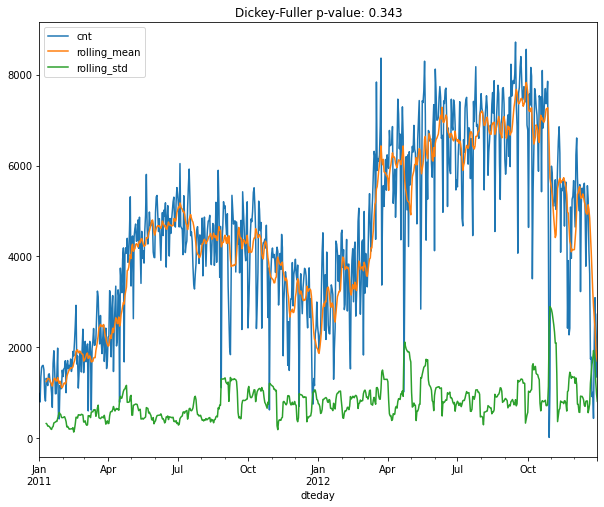

In [ ]:
test_stationarity(data_target["cnt"], figsize=(10, 8))

From this graph, I can see that the moving average nor standard deviations are not stationary. Furthermore, the Dickey-Fuller test returns values of 0.343 for target columns. This is strong evidence that the time series is not stationary, and I need to process it in order to obtain a stationary one. I will use 2 ways to make it stationarity: substract its rolling mean and to decompose it into a component that will containtrend, seasonality and residual components.

In [ ]:
cnt = data_target["cnt"]
cnt_ma = cnt.rolling(10).mean()
cnt_ma_diff = cnt - cnt_ma
cnt_ma_diff.dropna(inplace=True)

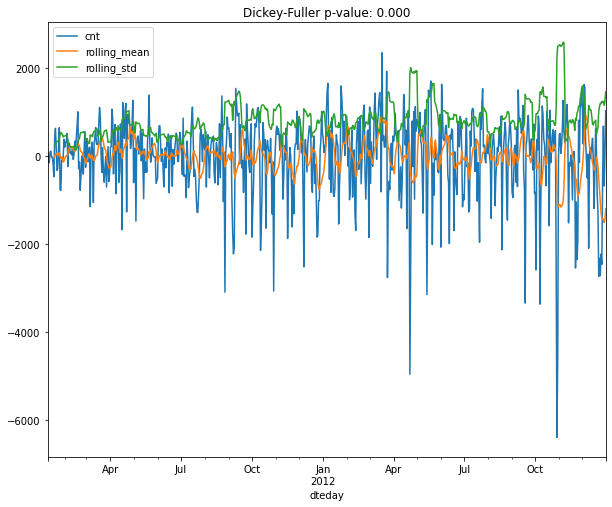

In [ ]:
test_stationarity(cnt_ma_diff, figsize=(10, 8))

As you can see, first technique (substracting its rolling mean) returned a time series, which is stationary, according to the Dickey-Fuller test. Now, I will check also the previously mentioned technique, that is, time series decomposition.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
cnt_decomposition = seasonal_decompose(data_target["cnt"])

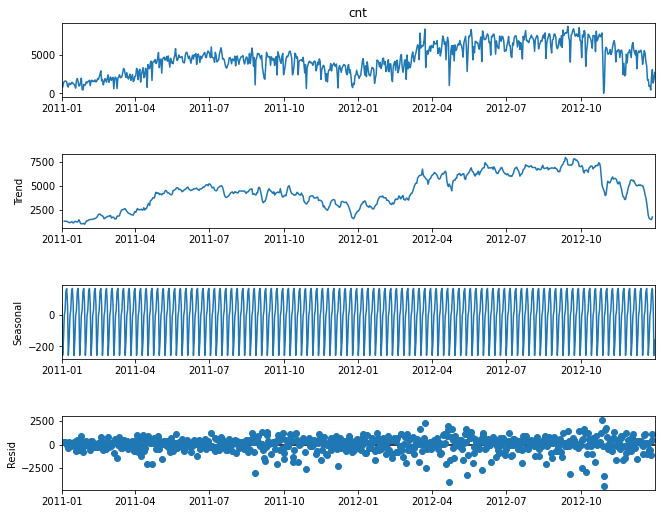

In [ ]:
cnt_plot = cnt_decomposition.plot()
cnt_plot.set_size_inches(10, 8)

Trend component represents a long-term progression of the series. A trend component is present when there is a persistent increase or decrease in the series what I can see in my data.
Seasonal component represents seasonality patterns in the data. A seasonal component persists when the data is influenced by certain seasonal factors so i can see high seasonality here.
Residual component represents an irregular or noisy component. This component describes random fluctuations in the data, which are not captured by the other components. In general, this is the residual of the time series, that is, once the other components have been removed.

In [ ]:
decomposition = seasonal_decompose(y, model="additive", period=24)

In [ ]:
import scipy.stats as st

Now i will do analysis of decomposition residuals becpuse i want to know probability function of my error.

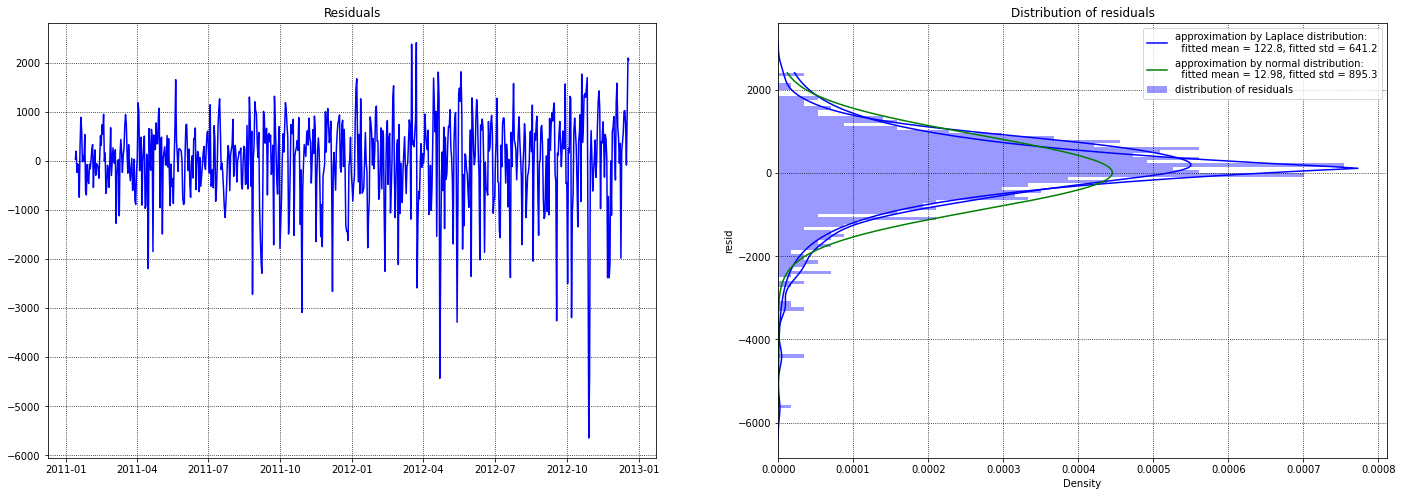

In [ ]:
resid = decomposition.resid
color = 'blue'

plt.subplots(1, 2, figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(resid, '-', color=color)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")
x_fit = np.linspace(resid.min(), resid.max(), 201)
loc_laplace, scale_laplace = st.laplace.fit(resid.dropna())
loc_norm, scale_norm = st.norm.fit(resid.dropna())
# print(f"Fitting of residuals by Laplace distribution: fitted mean = {loc:.3f}, fitted std = {scale:.3f}")
y_fit_laplace = st.laplace.pdf(x_fit, loc_laplace, scale_laplace)
y_fit_norm = st.norm.pdf(x_fit, loc_norm, scale_norm)

plt.subplot(1, 2, 2)
sns.distplot(resid, color=color, bins=100, vertical=True, label="distribution of residuals")
plt.plot(y_fit_laplace, x_fit, '-b',
         label=f"approximation by Laplace distribution:\n  fitted mean = {loc_laplace:.4g}, fitted std = {scale_laplace:.4g}")
plt.plot(y_fit_norm, x_fit, '-g',
         label=f"approximation by normal distribution:\n  fitted mean = {loc_norm:.4g}, fitted std = {scale_norm:.4g}")
plt.legend()
# plt.ylim(resid-0.02*y_range, y_max+0.02*y_range)
plt.title("Distribution of residuals")
plt.grid(linestyle=':', color='k')

plt.show()

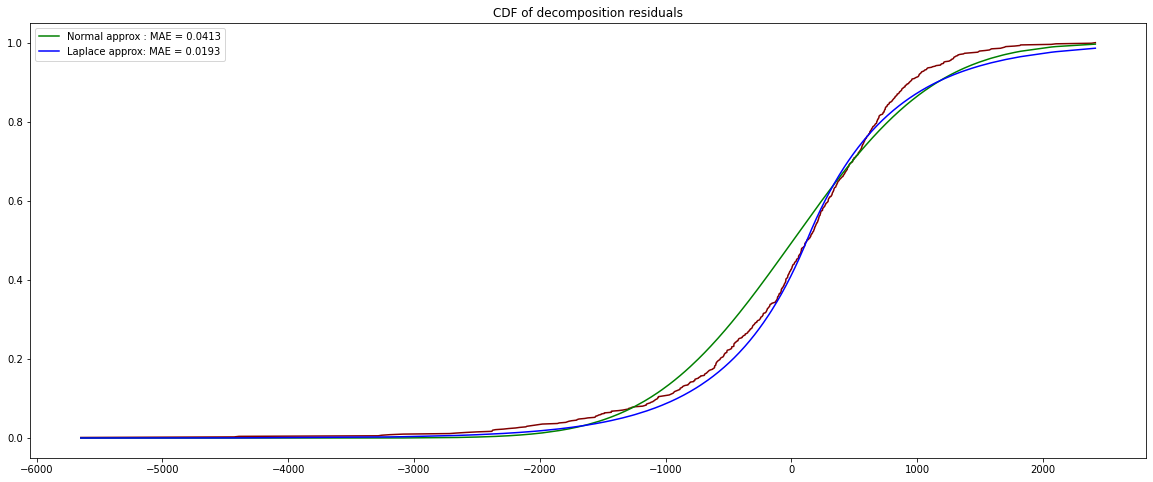

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_resid_instance = ECDF(resid.dropna())
resid_arr = resid.dropna().sort_values().values
ecdf_resid = ecdf_resid_instance(resid_arr)


cdf_norm = st.norm.cdf(resid_arr, loc=loc_norm, scale=scale_norm)
cdf_laplace = st.laplace.cdf(resid_arr, loc=loc_laplace, scale=scale_laplace)


mae_norm = mean_absolute_error(ecdf_resid, cdf_norm)
mae_laplace = mean_absolute_error(ecdf_resid, cdf_laplace)


plt.subplots(1, 1, figsize=(20, 8))
plt.plot(resid_arr, ecdf_resid, '-', color='maroon')
plt.plot(resid_arr, cdf_norm, '-g',
         label=f"Normal approx : MAE = {mae_norm:.3g}")
plt.plot(resid_arr, cdf_laplace, '-b',
         label=f"Laplace approx: MAE = {mae_laplace:.3g}")
plt.legend()
plt.title("CDF of decomposition residuals")
plt.show()

if I compare Normal and Laplace approx it looks like residuals have normal distribution. Now i will se autocorrelation of residuals.

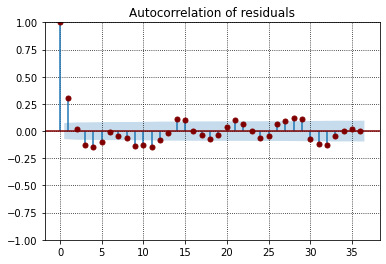

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lags = 36

plot_acf(resid.dropna(), lags=lags, color='maroon',
         title='Autocorrelation of residuals');
plt.grid(linestyle=':', color='k')
plt.show()

From here i can see that our data does not have perfect autocorrelation but could say that exist some period of 12. Next, i will do test for trend stationarity.

In [ ]:
trend = decomposition.trend.dropna()
alpha = 0.05
print(f"alpha = {alpha}\n")
# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(trend.dropna(), autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.\n")
else:
    print("The process is non-stationary.\n")


alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -2.013
p-value: 0.2809
The process is non-stationary.



In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(trend.dropna(), regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.\n")
else:
    print("The process is stationary.\n")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 2.476
p-value = 0.01
The process is non-stationary.



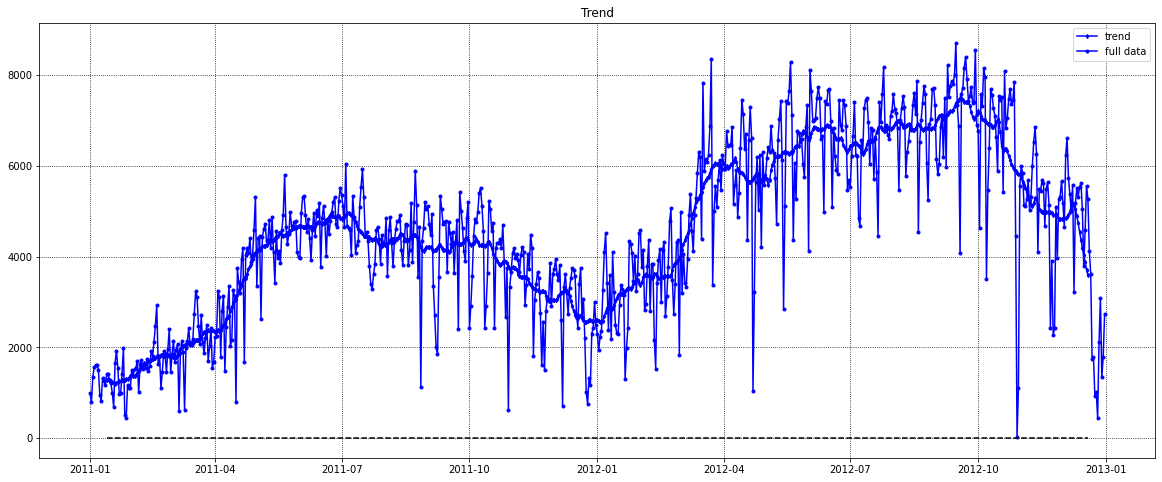

In [ ]:
plt.subplots(1, 1, figsize=(20, 8))

plt.plot(trend, '-d', color='blue', markersize=3, label='trend')
plt.plot(data_target, '-bo', markersize=3, label='full data')
plt.plot([trend.index[0], trend.index[-1]], [0, 0], '--k')
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title("Trend")
plt.show()

From here I can see that trend has changing course. First it increases, then it decreases, then it increases again and then suddenly decreases. So, I will do first derivative of trend and show graph.

Text(0.5, 1.0, '1st derivative of trend')

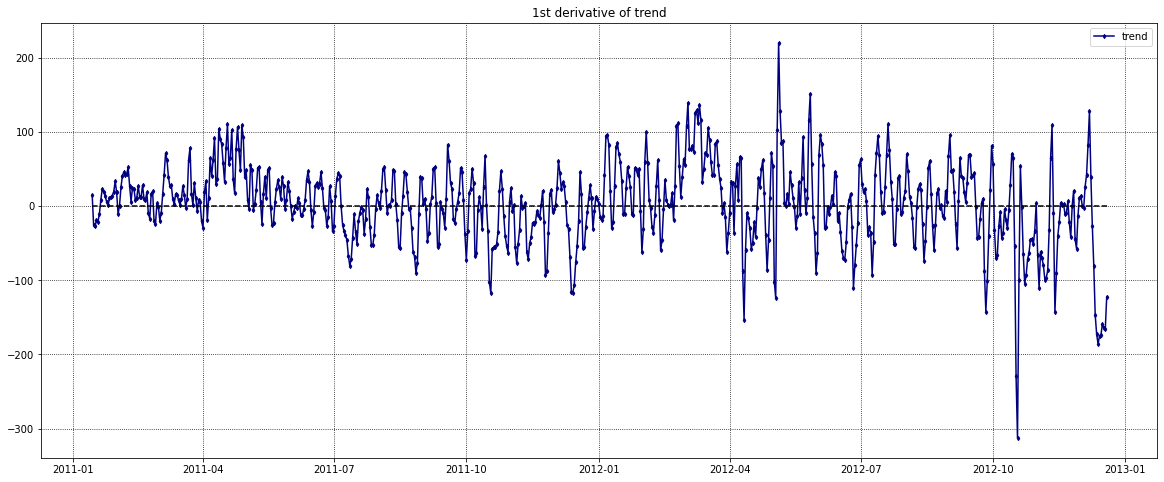

In [ ]:
trend_diff = trend.diff().dropna()

plt.subplots(1, 1, figsize=(20, 8))

plt.plot(trend_diff, '-d', color='navy', markersize=3, label='trend')
plt.plot([trend_diff.index[0], trend_diff.index[-1]], [0, 0], '--k')
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title("1st derivative of trend")

In [ ]:
alpha = 0.05
print(f"alpha = {alpha}\n")
# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(trend_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]:.4g}')
print(f'p-value: {result[1]:.4g}')
if result[1] < alpha:
    print("The process is stationary.")
else:
    print("The process is non-stationary.")

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -3.167
p-value: 0.02197
The process is stationary.


In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(trend_diff, regression='c')
print(f"KPSS Statistic = {kpsstest[0]:.4g}")
print(f"p-value = {kpsstest[1]:.4g}")
if kpsstest[1] < alpha:
    print("The process is non-stationary.")
else:
    print("The process is stationary.")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 0.6382
p-value = 0.01916
The process is non-stationary.


ADF concludes stationary, and KPSS concludes non-stationary – the series is difference stationary. Differencing is to be used to make series stationary. Then the differenced series is checked for stationarity.

In [ ]:
y =data_target["cnt"].diff().dropna()

In [ ]:
alpha = 0.05
print(f"alpha = {alpha}\n")

# ADF Test
print("==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): ")
result = adfuller(y, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < alpha:
    print("The process is stationary.\n")
else:
    print("The process is non-stationary.\n")

alpha = 0.05

==== Augmented Dickey–Fuller (Null hypothesis - The process is non-stationary): 
ADF Statistic: -11.778809074151903
p-value: 1.0467797548018686e-21
The process is stationary.



In [ ]:
print('==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):')
# kpss test
kpsstest = kpss(y, regression='c')
print("KPSS Statistic = " + str(kpsstest[0]))
print( "p-value = " +str(kpsstest[1]))
if kpsstest[1] < alpha:
    print("The process is non-stationary.\n")
else:
    print("The process is stationary.\n")

==== Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test (Null hypothesis - The process is stationary):
KPSS Statistic = 0.22555840865218865
p-value = 0.1
The process is stationary.



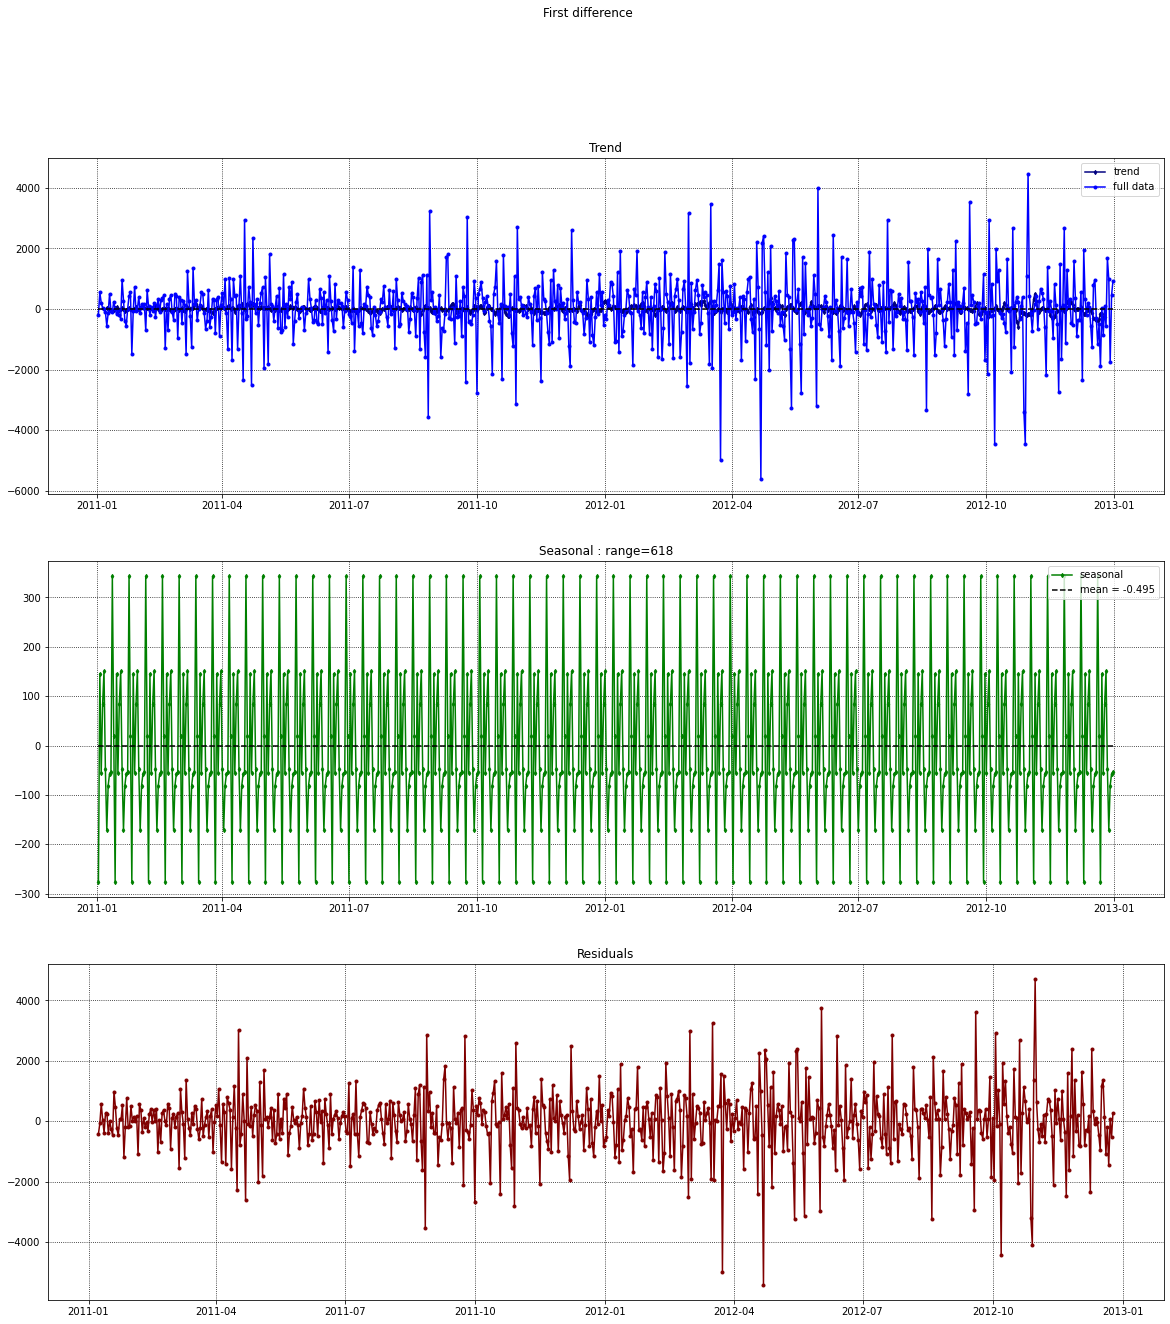

In [ ]:
decomposition = seasonal_decompose(y, model='additive', period=12)


plt.subplots(3, 1, figsize=(20, 21))
plt.suptitle("First difference")

plt.subplot(3, 1, 1)
plt.plot(decomposition.trend,
         '-d', color='navy', markersize=3, label='trend')
plt.plot(y, '-bo', markersize=3, label='full data')
# plt.plot(decomposition.trend.index[0], 0)
plt.plot([decomposition.trend.index[0], decomposition.trend.index[-1]], [0, 0], '--k')
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title("Trend")


plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal,
         '-gd', markersize=3, label='seasonal')
plt.plot([decomposition.seasonal.index[0], decomposition.seasonal.index[-1]],
         decomposition.seasonal.mean()*np.array([1, 1]), '--k',
         label=f"mean = {decomposition.seasonal.mean():.3g}")
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title(f"Seasonal : range={(decomposition.seasonal.max() - decomposition.seasonal.min()):.3g}")


plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, '-o', color='maroon', markersize=3)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")
plt.show()

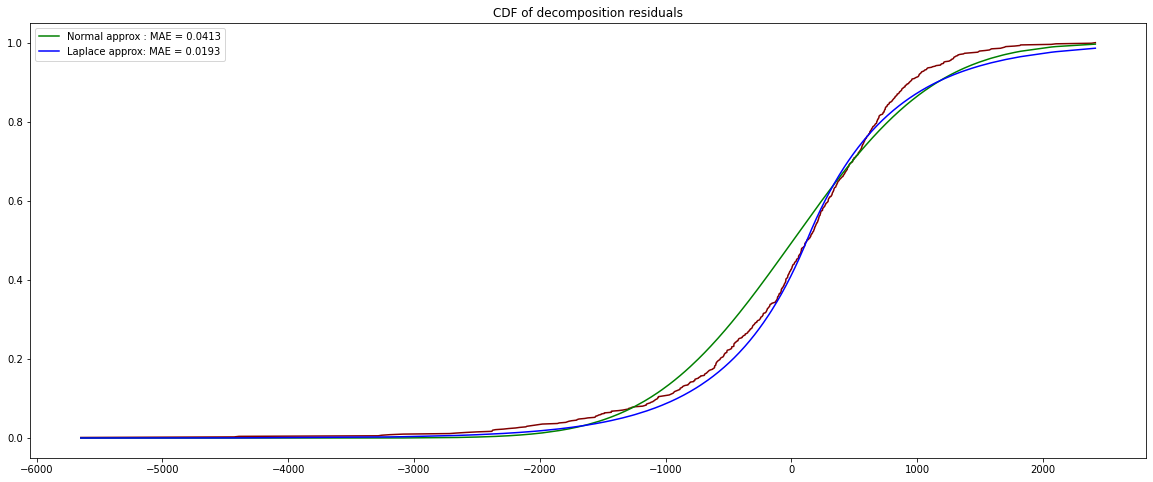

MAE_Gaussian/MAE_Laplace = 2.14.


In [ ]:
ecdf_resid_instance = ECDF(resid.dropna())
resid_arr = resid.dropna().sort_values().values
ecdf_resid = ecdf_resid_instance(resid_arr)


cdf_norm = st.norm.cdf(resid_arr, loc=loc_norm, scale=scale_norm)
cdf_laplace = st.laplace.cdf(resid_arr, loc=loc_laplace, scale=scale_laplace)


mae_norm = mean_absolute_error(ecdf_resid, cdf_norm)
mae_laplace = mean_absolute_error(ecdf_resid, cdf_laplace)


plt.subplots(1, 1, figsize=(20, 8))
plt.plot(resid_arr, ecdf_resid, '-', color='maroon')
plt.plot(resid_arr, cdf_norm, '-g',
         label=f"Normal approx : MAE = {mae_norm:.3g}")
plt.plot(resid_arr, cdf_laplace, '-b',
         label=f"Laplace approx: MAE = {mae_laplace:.3g}")
plt.legend()
plt.title("CDF of decomposition residuals")
plt.show()

print(f"MAE_Gaussian/MAE_Laplace = {mae_norm/mae_laplace:.3g}.")

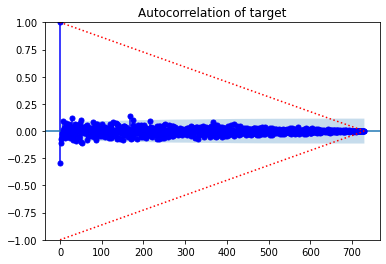

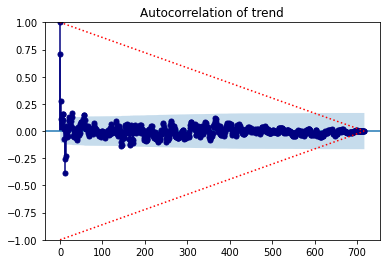

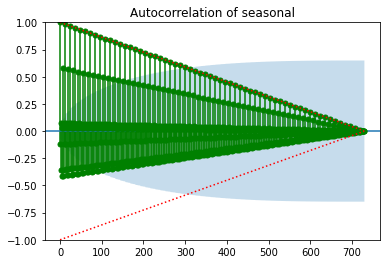

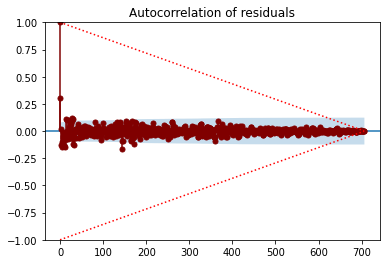

In [ ]:
N = len(y)
k = np.arange(0, N)
plot_acf(y,
         lags=N-1,
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b',
         title='Autocorrelation of target');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')

trend = decomposition.trend.dropna()
N = len(trend)
k = np.arange(0, N)
plot_acf(trend,
         lags=N-1,
         vlines_kwargs={'color' : 'navy'},
         markerfacecolor='navy', markeredgecolor='navy',
         title='Autocorrelation of trend');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


seasonal = decomposition.seasonal
N = len(seasonal)
k = np.arange(0, N)
plot_acf(seasonal,
         lags=N-1,
         vlines_kwargs={'color' : 'g'},
         markerfacecolor='g', markeredgecolor='g',
         title='Autocorrelation of seasonal');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(resid.dropna())
k = np.arange(0, N)
plot_acf(resid.dropna(),
         lags=N-1,
         vlines_kwargs={'color' : 'maroon'},
         markerfacecolor='maroon', markeredgecolor='maroon',
         title='Autocorrelation of residuals');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


plt.show()

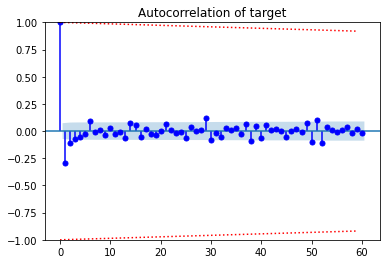

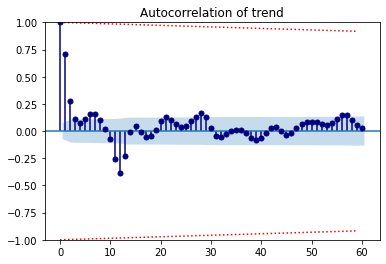

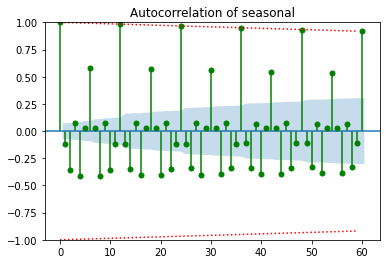

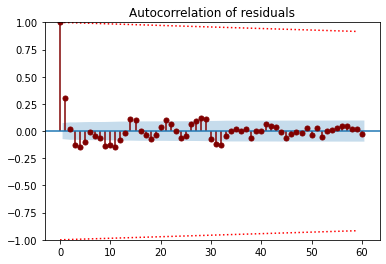

In [ ]:
lags = 60

N = len(y)
k = np.arange(0, lags)
plot_acf(y,
         lags=lags,
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b',
         title='Autocorrelation of target');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(trend)
plot_acf(trend,
         lags=lags,
         vlines_kwargs={'color' : 'navy'},
         markerfacecolor='navy', markeredgecolor='navy',
         title='Autocorrelation of trend');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


seasonal = decomposition.seasonal
N = len(seasonal)
plot_acf(seasonal,
         lags=lags,
         vlines_kwargs={'color' : 'g'},
         markerfacecolor='g', markeredgecolor='g',
         title='Autocorrelation of seasonal');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(resid.dropna())
plot_acf(resid.dropna(),
         lags=lags,

         vlines_kwargs={'color' : 'maroon'},
         markerfacecolor='maroon', markeredgecolor='maroon',
         title='Autocorrelation of residuals');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


plt.show()


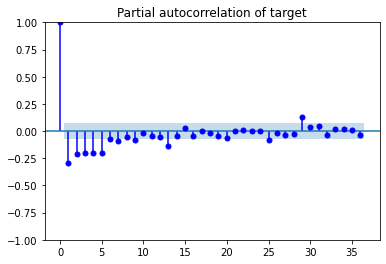

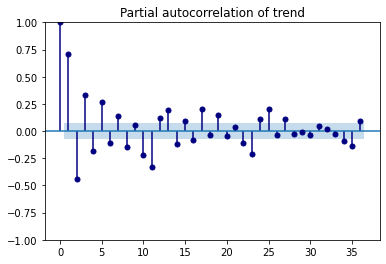

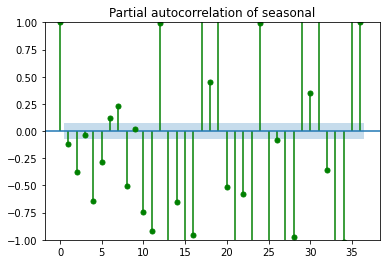

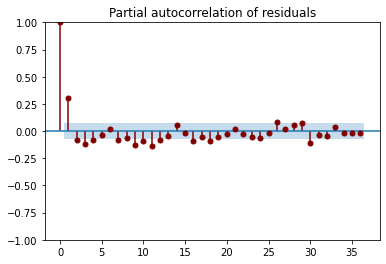

In [ ]:
lags = 36

plot_pacf(y,
         lags=lags,
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b',
         title='Partial autocorrelation of target');


plot_pacf(trend.dropna(),
         lags=lags,
         vlines_kwargs={'color' : 'navy'},
         markerfacecolor='navy', markeredgecolor='navy',
         title='Partial autocorrelation of trend');


seasonal = decomposition.seasonal
plot_pacf(seasonal,
         lags=lags,
         vlines_kwargs={'color' : 'g'},
         markerfacecolor='g', markeredgecolor='g',
         title='Partial autocorrelation of seasonal');


plot_pacf(resid.dropna(),
         lags=lags,
         vlines_kwargs={'color' : 'maroon'},
         markerfacecolor='maroon', markeredgecolor='maroon',
         title='Partial autocorrelation of residuals');


plt.show()

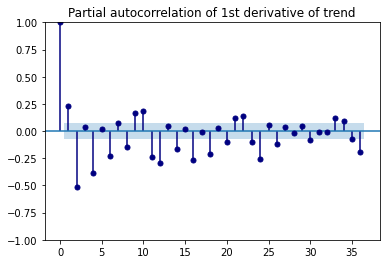

In [ ]:
plot_pacf(trend.dropna().diff().dropna(),
         lags=lags,
         vlines_kwargs={'color' : 'navy'},
         markerfacecolor='navy', markeredgecolor='navy',
         title='Partial autocorrelation of 1st derivative of trend');


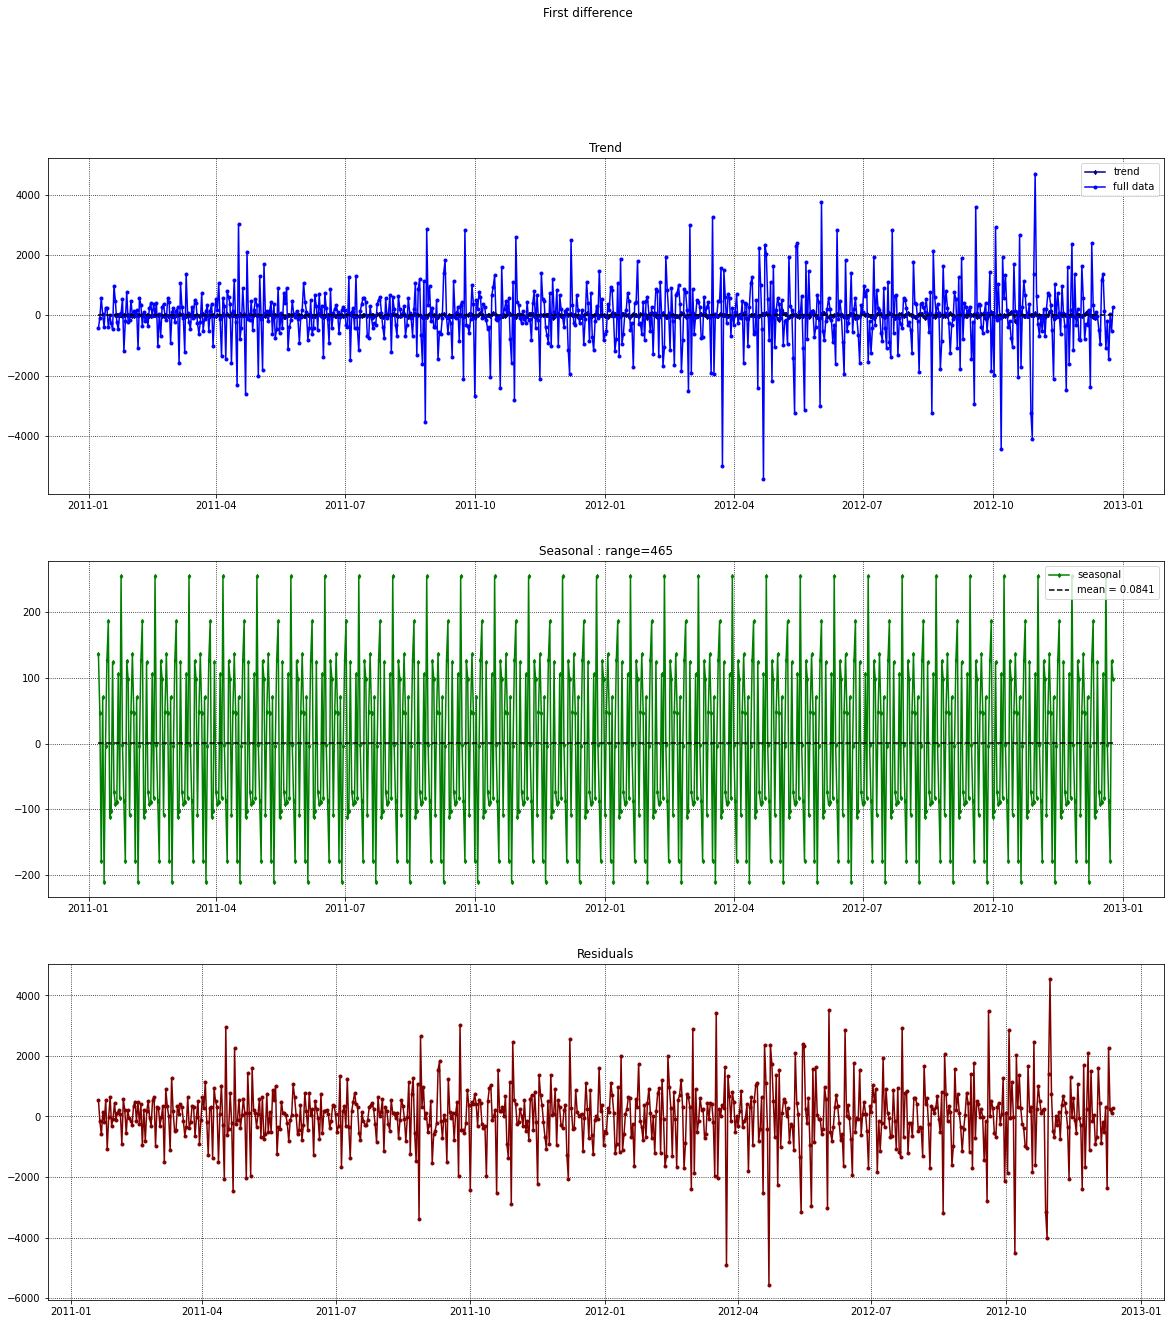

In [ ]:
y2 = decomposition.resid
y2 = y2.dropna()


decomposition = seasonal_decompose(y2, model='additive', period=12*2)



plt.subplots(3, 1, figsize=(20, 21))
plt.suptitle("First difference")

plt.subplot(3, 1, 1)
plt.plot(decomposition.trend,
         '-d', color='navy', markersize=3, label='trend')
plt.plot(y2, '-bo', markersize=3, label='full data')
# plt.plot(decomposition.trend.index[0], 0)
plt.plot([decomposition.trend.index[0], decomposition.trend.index[-1]], [0, 0], '--k')
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title("Trend")


plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal,
         '-gd', markersize=3, label='seasonal')
plt.plot([decomposition.seasonal.index[0], decomposition.seasonal.index[-1]],
         decomposition.seasonal.mean()*np.array([1, 1]), '--k',
         label=f"mean = {decomposition.seasonal.mean():.3g}")
plt.legend()
plt.grid(linestyle=':', color='k')
plt.title(f"Seasonal : range={(decomposition.seasonal.max() - decomposition.seasonal.min()):.3g}")


plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, '-o', color='maroon', markersize=3)
plt.grid(linestyle=':', color='k')
plt.title("Residuals")
plt.show()

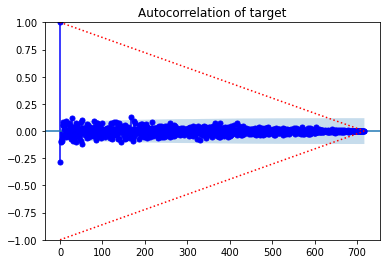

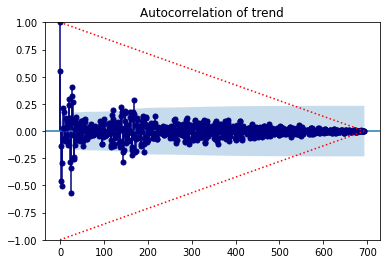

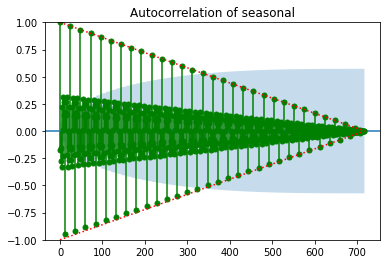

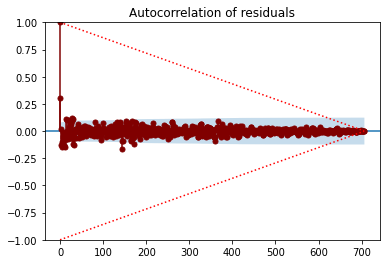

In [ ]:
N = len(y2)
k = np.arange(0, N)
plot_acf(y2,
         lags=N-1,
         vlines_kwargs={'color' : 'b'},
         markerfacecolor='b', markeredgecolor='b',
         title='Autocorrelation of target');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')

trend = decomposition.trend.dropna()
N = len(trend)
k = np.arange(0, N)
plot_acf(trend,
         lags=N-1,
         vlines_kwargs={'color' : 'navy'},
         markerfacecolor='navy', markeredgecolor='navy',
         title='Autocorrelation of trend');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


seasonal = decomposition.seasonal
N = len(seasonal)
k = np.arange(0, N)
plot_acf(seasonal,
         lags=N-1,
         vlines_kwargs={'color' : 'g'},
         markerfacecolor='g', markeredgecolor='g',
         title='Autocorrelation of seasonal');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


N = len(resid.dropna())
k = np.arange(0, N)
plot_acf(resid.dropna(),
         lags=N-1,
         vlines_kwargs={'color' : 'maroon'},
         markerfacecolor='maroon', markeredgecolor='maroon',
         title='Autocorrelation of residuals');
plt.plot(k, 1-k/N, ':r')
plt.plot(k, -1+k/N, ':r')


plt.show()

### Feature engeenering

Now I will make a correlation matrix on the features so far.

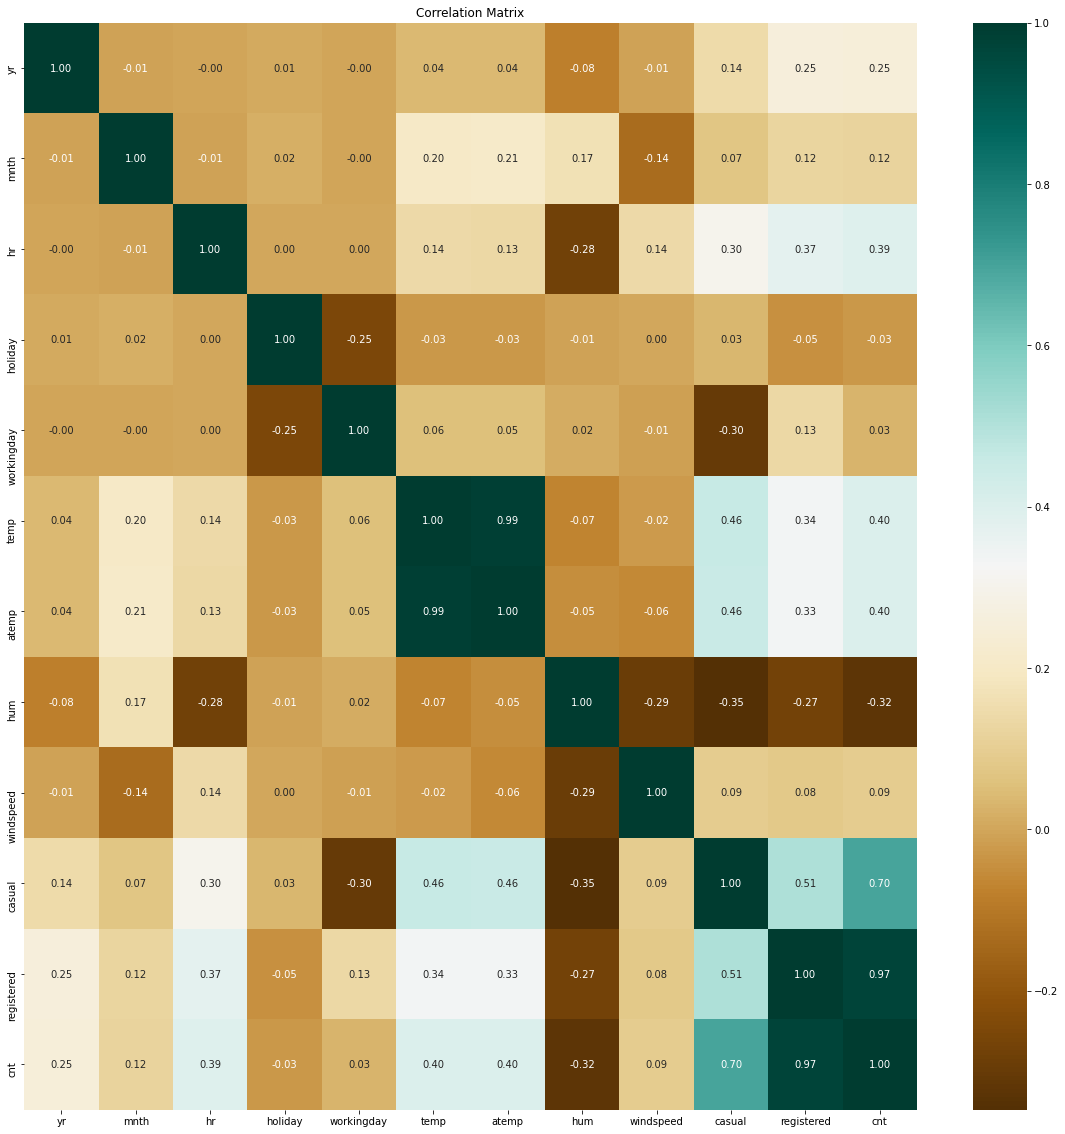

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = new_data.corr()

# Set up figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Set up heatmap using Seaborn
sns.heatmap(corr, cmap='BrBG', annot=True, fmt='.2f', ax=ax)

# Set plot title
plt.title('Correlation Matrix')

# Display plot
plt.show()

From here I can see that the temp and atemp columns are highly correlated, and also the same with the target column, so I decided to apply the PCA method on them. After it, i will drop columns temp and atemp.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
new_data['temperature'] = pca.fit_transform(new_data[['temp','atemp']])

In [ ]:
new_data.drop('temp', axis=1, inplace=True)
new_data.drop('atemp', axis=1, inplace=True)

In [ ]:
def vif(X):

    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

    return vif

In [ ]:
vif(new_data[[i for i in new_data.describe().columns if i not in ["casual", "registered", "cnt"]]])

,VIF Factor,features
0,29.820536,yr
1,5.023624,mnth
2,4.191077,hr
3,1.100655,holiday
4,3.376194,workingday
5,14.111340,hum
6,3.790249,windspeed
7,1.075937,temperature


Since the VIF factor of any is not too large I wont remove any column. In the following, I will make dummy columns from categorical columns.

In [ ]:
new_data = pd.get_dummies(new_data, columns=['weathersit', 'season', 'mnth', 'weekday', "hr"])
new_data.head()

,dteday,yr,holiday,workingday,hum,windspeed,casual,registered,cnt,temperature,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,2011-01-01,2011,0,0,81.0,0.0,3.0,13.0,16,-0.316853,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01,2011,0,0,80.0,0.0,8.0,32.0,40,-0.341897,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01,2011,0,0,80.0,0.0,5.0,27.0,32,-0.341897,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01,2011,0,0,75.0,0.0,3.0,10.0,13,-0.316853,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01,2011,0,0,75.0,0.0,0.0,1.0,1,-0.316853,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dteday                      17379 non-null  object 
 1   yr                          17379 non-null  int64  
 2   holiday                     17379 non-null  int64  
 3   workingday                  17379 non-null  int64  
 4   hum                         17379 non-null  float64
 5   windspeed                   17379 non-null  float64
 6   casual                      17379 non-null  float64
 7   registered                  17379 non-null  float64
 8   cnt                         17379 non-null  int64  
 9   temperature                 17379 non-null  float64
 10  weathersit_clear            17379 non-null  uint8  
 11  weathersit_cloudy           17379 non-null  uint8  
 12  weathersit_heavy_rain_snow  17379 non-null  uint8  
 13  weathersit_light_rain_snow  173

In [ ]:
new_data["yr"] = new_data["yr"].map({2011: 0, 2012: 1})

In [ ]:
new_data.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'temperature', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_heavy_rain_snow',
       'weathersit_light_rain_snow', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [ ]:
new_data["cnt"] = np.sqrt(new_data["cnt"])

In [ ]:
X = new_data[['dteday', 'yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]

In [ ]:
y= new_data['cnt']

In [ ]:
X_train = X[X["dteday"] < "2012-12-01"][['yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]
X_test = X[X["dteday"] >= "2012-12-01"][['yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]

In [ ]:
y_train = y[:len(X_train)]
y_test = y[len(X_train):]

In [ ]:
print(X_train.shape)
print(X_test.shape)

(16637, 46)
(742, 46)


In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_result = []

In [ ]:
def predict(ml_model, model_name, X_train, y_train, X_test, y_test, model_result):

    # model fitting
    model = ml_model.fit(X_train, y_train)

    # predicting values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

  # Reverse the transformation on the predictions    (In case if we need y_train_pred in original and transformed way)
    y_train_pred_original = np.power(y_train_pred, 2)
    y_test_pred_original = np.power(y_test_pred, 2)

    # graph --> best fit line on test data
    sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'green'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    '''Evaluation metrics on train data'''
    train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
    print(f'train MAE : {train_MAE}')
    print('-'*15)

    '''Evaluation metrics on test data'''
    test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
    print(f'test MAE : {test_MAE}')
    print('-'*15)

    # graph --> actual vs predicted on test data
    plt.figure(figsize=(6,5))
    plt.plot((y_test_pred)[:200])
    plt.plot(np.array((y_test)[:200]))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('Test Data on last 20 points')
    plt.show()
    print('-'*25)

    '''actual vs predicted value on test data'''
    d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
    print(pd.DataFrame(data=d).head().T)
    print('-'*25)

    # using the score from the performance metrics to create the final model_result.
    model_result.append({'model':model_name,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE})

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

train MAE : 2.557
---------------
test MAE : 3.412
---------------


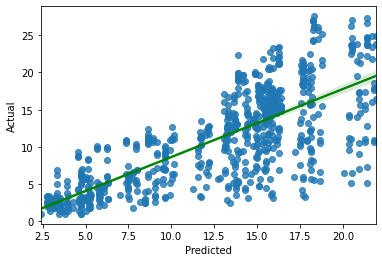

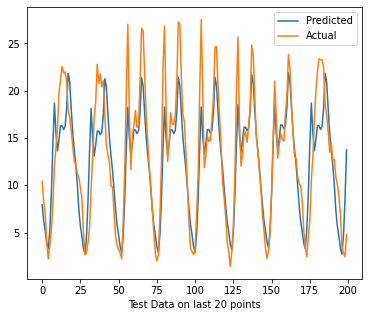

-------------------------
               16637     16638     16639     16640     16641
y_actual   10.392305  8.306624  7.071068  3.872983  2.236068
y_predict   7.925470  6.226252  5.147638  3.914728  3.296564
error       2.466835  2.080372  1.923430 -0.041745 -1.060496
-------------------------


In [ ]:
predict(lin_reg, 'lin reg', X_train, y_train, X_test, y_test, model_result)

In [ ]:
list(set(new_data.columns).difference(set(X.columns)))

['weathersit_heavy_rain_snow',
 'season_winter',
 'temperature',
 'season_spring',
 'cnt',
 'hum',
 'windspeed',
 'weathersit_cloudy',
 'season_fall',
 'season_summer',
 'weathersit_clear',
 'casual',
 'weathersit_light_rain_snow',
 'registered']

In [ ]:
new_data

,dteday,yr,holiday,workingday,hum,windspeed,casual,registered,cnt,temperature,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
0,2011-01-01,0,0,0,81.0,0.0000,3.0,13.0,4.000000,-0.316853,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-01,0,0,0,80.0,0.0000,8.0,32.0,6.324555,-0.341897,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-01,0,0,0,80.0,0.0000,5.0,27.0,5.656854,-0.341897,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01,0,0,0,75.0,0.0000,3.0,10.0,3.605551,-0.316853,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-01,0,0,0,75.0,0.0000,0.0,1.0,1.000000,-0.316853,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,0,1,60.0,11.0014,11.0,108.0,10.908712,-0.322081,...,0,0,0,0,0,1,0,0,0,0
17375,2012-12-31,1,0,1,60.0,11.0014,8.0,81.0,9.433981,-0.322081,...,0,0,0,0,0,0,1,0,0,0
17376,2012-12-31,1,0,1,60.0,11.0014,7.0,83.0,9.486833,-0.322081,...,0,0,0,0,0,0,0,1,0,0
17377,2012-12-31,1,0,1,56.0,8.9981,13.0,48.0,7.810250,-0.312035,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
new_data.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'temperature', 'weathersit_clear',
       'weathersit_cloudy', 'weathersit_heavy_rain_snow',
       'weathersit_light_rain_snow', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3',
       'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11',
       'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19',
       'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [ ]:
model_improvement_data = new_data[[ 'cnt',
                                             'dteday',
                                             'weathersit_light_rain_snow',
                                             'season_winter',
                                             'temperature',
                                             'season_spring',
                                             'windspeed',
                                             'weathersit_cloudy',
                                             'weathersit_heavy_rain_snow',
                                             'weathersit_clear',
                                             'hum',
                                             'season_summer',
                                             'season_fall' ]]

In [ ]:
model_improvement_data

,cnt,dteday,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall
0,4.000000,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,81.0,0,0
1,6.324555,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0
2,5.656854,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0
3,3.605551,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0
4,1.000000,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.908712,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,60.0,0,0
17375,9.433981,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,60.0,0,0
17376,9.486833,2012-12-31,0,1,-0.322081,0,11.0014,0,0,1,60.0,0,0
17377,7.810250,2012-12-31,0,1,-0.312035,0,8.9981,0,0,1,56.0,0,0


In [ ]:
# Perform target decomposition on training data
decomposition = seasonal_decompose(model_improvement_data['cnt'], model='multiplicative', period=12)
# Extract decomposed components
model_improvement_data['trend'] = decomposition.trend
model_improvement_data['seasonal'] = decomposition.seasonal
model_improvement_data['residual'] = decomposition.resid

In [ ]:
model_improvement_data.corr()

,cnt,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,seasonal,residual
cnt,1.000000,-0.136505,-0.248175,0.420484,0.059088,0.109316,-0.035583,-0.008118,0.111882,-0.351313,0.151260,0.034137,0.804956,9.104062e-02,7.832661e-01
weathersit_light_rain_snow,-0.136505,1.000000,0.011075,-0.065236,0.022216,0.069934,-0.177417,-0.003918,-0.412414,0.304179,-0.047072,0.014421,-0.174041,-5.254090e-03,-4.081668e-02
season_winter,-0.248175,0.011075,1.000000,-0.587248,-0.331312,0.116202,0.029224,0.023123,-0.034074,-0.136380,-0.335693,-0.322401,-0.399232,-5.056081e-05,2.865153e-03
temperature,0.420484,-0.065236,-0.587248,1.000000,0.148155,-0.040666,-0.068434,-0.021646,0.101557,-0.061056,0.634283,-0.209653,0.594835,-9.413777e-03,9.217640e-02
season_spring,0.059088,0.022216,-0.331312,0.148155,1.000000,0.063473,-0.002648,-0.007661,-0.010150,-0.001703,-0.344433,-0.330795,0.094509,-3.657430e-04,-4.292008e-03
windspeed,0.109316,0.069934,0.116202,-0.040666,0.063473,1.000000,-0.049231,0.001494,0.005190,-0.291459,-0.089419,-0.089407,0.068143,-1.586435e-02,1.171948e-01
weathersit_cloudy,-0.035583,-0.177417,0.029224,-0.068434,-0.002648,-0.049231,1.000000,-0.007818,-0.822961,0.220481,-0.068338,0.043164,-0.066038,8.146777e-03,1.879962e-02
weathersit_heavy_rain_snow,-0.008118,-0.003918,0.023123,-0.021646,-0.007661,0.001494,-0.007818,1.000000,-0.018174,0.017765,-0.007762,-0.007455,-0.014831,5.727271e-03,1.975202e-03
weathersit_clear,0.111882,-0.412414,-0.034074,0.101557,-0.010150,0.005190,-0.822961,-0.018174,1.000000,-0.379973,0.090609,-0.048059,0.161929,-4.668149e-03,6.094615e-03
hum,-0.351313,0.304179,-0.136380,-0.061056,-0.001703,-0.291459,0.220481,0.017765,-0.379973,1.000000,0.020877,0.116914,-0.395272,2.121788e-02,-1.832158e-01


In [ ]:
model_improvement_data['trend'].nunique()

17367

In [ ]:
model_improvement_data

,cnt,dteday,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,seasonal,residual
0,4.000000,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,81.0,0,0,NaN,0.963475,NaN
1,6.324555,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0,NaN,1.025094,NaN
2,5.656854,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0,NaN,1.081503,NaN
3,3.605551,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0,NaN,1.106744,NaN
4,1.000000,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0,NaN,1.042192,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,10.908712,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,60.0,0,0,NaN,0.976083,NaN
17375,9.433981,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,60.0,0,0,NaN,0.927912,NaN
17376,9.486833,2012-12-31,0,1,-0.322081,0,11.0014,0,0,1,60.0,0,0,NaN,0.963475,NaN
17377,7.810250,2012-12-31,0,1,-0.312035,0,8.9981,0,0,1,56.0,0,0,NaN,1.025094,NaN


In [ ]:
model_improvement_data = model_improvement_data.dropna()

In [ ]:
model_improvement_data

,cnt,dteday,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,seasonal,residual
6,1.414214,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0,3.947433,0.960012,0.373184
7,1.732051,2011-01-01,0,1,-0.366874,0,0.0000,0,0,1,86.0,0,0,4.303098,0.965275,0.416993
8,2.828427,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0,4.636831,0.974791,0.625767
9,3.741657,2011-01-01,0,1,-0.216810,0,0.0000,0,0,1,76.0,0,0,5.116885,0.983965,0.743154
10,6.000000,2011-01-01,0,1,-0.141811,0,16.9979,0,0,1,76.0,0,0,5.763810,0.976083,1.066485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17368,14.247807,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,44.0,0,0,13.436480,1.042192,1.017453
17369,15.716234,2012-12-31,0,1,-0.297104,0,15.0013,1,0,0,45.0,0,0,13.316612,0.992952,1.188574
17370,17.748239,2012-12-31,0,1,-0.286991,0,8.9981,1,0,0,45.0,0,0,12.999564,0.960012,1.422164
17371,14.628739,2012-12-31,0,1,-0.322081,0,12.9980,1,0,0,48.0,0,0,12.741758,0.965275,1.189396


In [ ]:
X = model_improvement_data[['dteday', 'weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'residual', 'seasonal']]

In [ ]:
X

,dteday,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,residual,seasonal
6,2011-01-01,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0,3.947433,0.373184,0.960012
7,2011-01-01,0,1,-0.366874,0,0.0000,0,0,1,86.0,0,0,4.303098,0.416993,0.965275
8,2011-01-01,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0,4.636831,0.625767,0.974791
9,2011-01-01,0,1,-0.216810,0,0.0000,0,0,1,76.0,0,0,5.116885,0.743154,0.983965
10,2011-01-01,0,1,-0.141811,0,16.9979,0,0,1,76.0,0,0,5.763810,1.066485,0.976083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17368,2012-12-31,0,1,-0.322081,0,11.0014,1,0,0,44.0,0,0,13.436480,1.017453,1.042192
17369,2012-12-31,0,1,-0.297104,0,15.0013,1,0,0,45.0,0,0,13.316612,1.188574,0.992952
17370,2012-12-31,0,1,-0.286991,0,8.9981,1,0,0,45.0,0,0,12.999564,1.422164,0.960012
17371,2012-12-31,0,1,-0.322081,0,12.9980,1,0,0,48.0,0,0,12.741758,1.189396,0.965275


In [ ]:
y= model_improvement_data['cnt']

In [ ]:
X_train_new = X[X["dteday"] < "2012-12-01"][['weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'seasonal']]
X_test_new = X[X["dteday"] >= "2012-12-01"][['weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'seasonal']]

In [ ]:
X_train_new

,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,seasonal
6,0,1,-0.341897,0,0.0000,0,0,1,80.0,0,0,3.947433,0.960012
7,0,1,-0.366874,0,0.0000,0,0,1,86.0,0,0,4.303098,0.965275
8,0,1,-0.316853,0,0.0000,0,0,1,75.0,0,0,4.636831,0.974791
9,0,1,-0.216810,0,0.0000,0,0,1,76.0,0,0,5.116885,0.983965
10,0,1,-0.141811,0,16.9979,0,0,1,76.0,0,0,5.763810,0.976083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,0,0,-0.216810,0,0.0000,0,0,1,66.0,0,1,16.195726,0.963475
16633,0,0,-0.216810,0,0.0000,0,0,1,66.0,0,1,15.501905,1.025094
16634,0,0,-0.251900,0,6.0032,0,0,1,75.0,0,1,14.580923,1.081503
16635,0,0,-0.241854,0,0.0000,0,0,1,75.0,0,1,13.280081,1.106744


In [ ]:
X_test_new

,weathersit_light_rain_snow,season_winter,temperature,season_spring,windspeed,weathersit_cloudy,weathersit_heavy_rain_snow,weathersit_clear,hum,season_summer,season_fall,trend,seasonal
16637,0,0,-0.291875,0,0.0000,0,0,1,81.0,0,1,10.101261,0.992952
16638,0,0,-0.291875,0,0.0000,0,0,1,81.0,0,1,8.899423,0.960012
16639,0,0,-0.291875,0,0.0000,1,0,0,81.0,0,1,8.268936,0.965275
16640,0,0,-0.312035,0,8.9981,1,0,0,81.0,0,1,8.131945,0.974791
16641,0,0,-0.301922,0,6.0032,0,0,1,81.0,0,1,8.281843,0.983965
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17368,0,1,-0.322081,0,11.0014,1,0,0,44.0,0,0,13.436480,1.042192
17369,0,1,-0.297104,0,15.0013,1,0,0,45.0,0,0,13.316612,0.992952
17370,0,1,-0.286991,0,8.9981,1,0,0,45.0,0,0,12.999564,0.960012
17371,0,1,-0.322081,0,12.9980,1,0,0,48.0,0,0,12.741758,0.965275


In [ ]:
y_train_new = y[:len(X_train_new)]
y_test_new = y[len(X_train_new):]

In [ ]:
print(X_train_new.shape)
print(X_test_new.shape)

(16631, 13)
(736, 13)


In [ ]:
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)

train MAE : 3.017
---------------
test MAE : 2.758
---------------


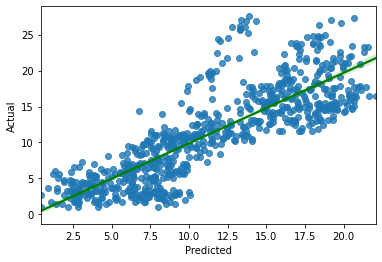

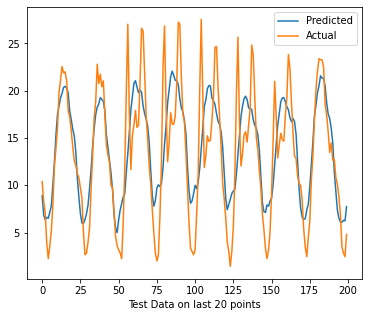

-------------------------
               16637     16638     16639     16640     16641
y_actual   10.392305  8.306624  7.071068  3.872983  2.236068
y_predict   8.902134  6.836880  6.352324  6.615399  6.499963
error       1.490170  1.469744  0.718743 -2.742416 -4.263895
-------------------------


In [ ]:
predict(lin_reg, 'lin reg', X_train_new, y_train_new, X_test_new, y_test_new, [])

# OVDEEEE

In [ ]:
new_data["trend"] = model_improvement_data["trend"]

In [ ]:
new_data["residual"] = model_improvement_data["residual"]

In [ ]:
new_data["seasonal"] = model_improvement_data["seasonal"]

In [ ]:
X = new_data[['dteday', 'weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'residual', 'seasonal',
       'yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]

y= new_data['cnt']

In [ ]:
X_train_all = X[X["dteday"] < "2012-12-01"][['weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'residual', 'seasonal',
       'yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]

X_test_all = X[X["dteday"] >= "2012-12-01"][['weathersit_light_rain_snow', 'season_winter',
       'temperature', 'season_spring', 'windspeed', 'weathersit_cloudy',
       'weathersit_heavy_rain_snow', 'weathersit_clear', 'hum',
       'season_summer', 'season_fall', 'trend', 'residual', 'seasonal',
       'yr', 'holiday', 'workingday', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']]

In [ ]:
y_train_all = y[:len(X_train_all)]
y_test_all = y[len(X_train_all):]

In [ ]:
print(X_train_all.shape)
print(X_test_all.shape)

(16637, 60)
(742, 60)


In [ ]:
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)

In [ ]:
predict(lin_reg, 'lin reg', X_train_all, y_train_all, X_test_all, y_test_all, [])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train = new_data[new_data["dteday"] < "2012-12-01"]
test = new_data[new_data["dteday"] >= "2012-12-01"]

# Fit an ARIMA model to the training data
model = ARIMA(train['cnt'], order=(24, 1, 24))
model_fit = model.fit()

In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(test['cnt'], predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['cnt'], predictions)

In [ ]:
# Print the model's performance metrics
print(f'Mean Absolute Error: {mae}')

SARIMAX

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# just an example
model = SARIMAX(train['cnt'], order=(1,1,1))
results = model.fit()
# statistics of the model
results.summary()

In [ ]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-6
for p in range(24):
  # Loop over q values from 0-6
    for q in range(24):
      	# create and fit ARMA(p,q) model
        model = SARIMAX(train['cnt'], order=(p,1,q)) #because adf test showed that d=1
        results = model.fit()

        # Append order and results tuple
        order_aic_bic.append((p,q,results.aic, results.bic))

In [ ]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p','q','AIC','BIC'])

# Print order_df in order of increasing AIC
order_df.sort_values('AIC')

In [ ]:
order_df.sort_values('BIC')

In [ ]:
sarima_model = SARIMAX(train['cnt'], order=(4,1,5))
# fit model
sarima_results = sarima_model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(sarima_results.resid))

# Print mean absolute error
print('MAE: %.3f' % mae)

In [ ]:
sarima_results.summary()

In [ ]:
# Create the 4 diagostics plots using plot_diagnostics method
sarima_results.plot_diagnostics()
plt.show()